In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [15]:
reeses = cv2.imread('reeses_puffs.png',0)
cereal = cv2.imread('many_cereals.jpg',0)

In [16]:
sift = cv2.xfeatures2d.SIFT_create()


In [17]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereal,None)

In [18]:
FLANN_INDEX_KDTREE = 0;
index_params = dict(algorithm = FLANN_INDEX_KDTREE,trees = 6)
search_params = dict(checks = 30)

In [19]:
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [20]:
good = []
for i,j in matches:
    if i.distance < 0.75*j.distance:
        good.append([i])

In [21]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereal,kp2,good,None,flags = 0)

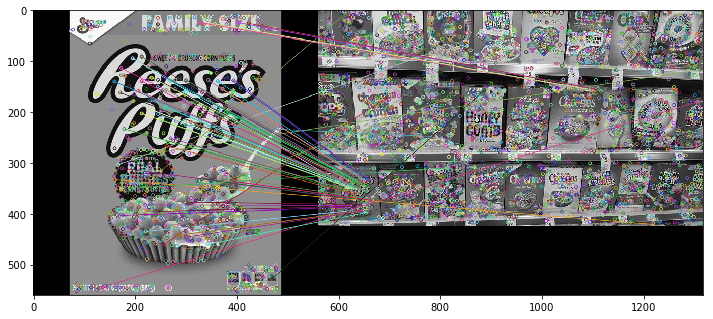

In [22]:
display(flann_matches)

In [26]:
flann_onlyLines_matches = cv2.drawMatchesKnn(reeses,kp1,cereal,kp2,good,None,flags = 2)

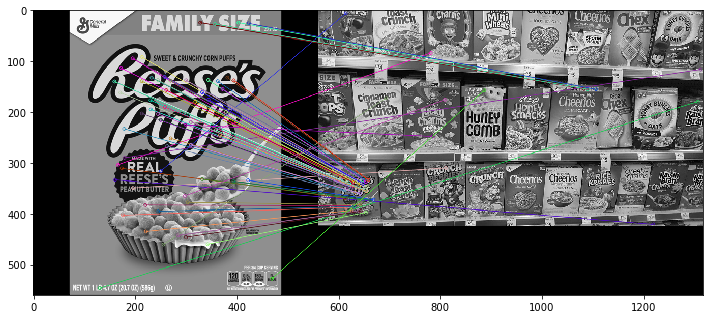

In [27]:
display(flann_onlyLines_matches)

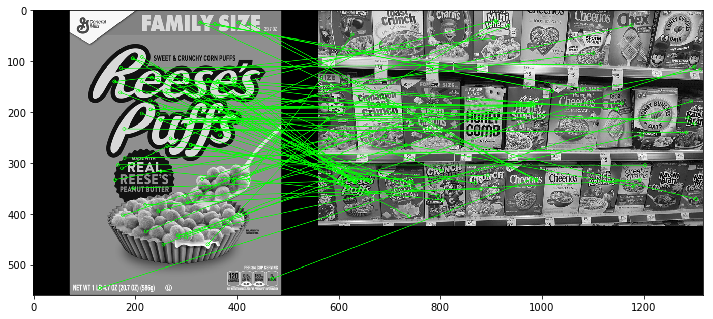

In [41]:
reeses = cv2.imread('reeses_puffs.png',0)
cereal = cv2.imread('many_cereals.jpg',0)

sift = cv2.xfeatures2d.SIFT_create()



kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereal,None)


FLANN_INDEX_KDTREE = 0;
index_params = dict(algorithm = FLANN_INDEX_KDTREE,trees = 5)
search_params = dict(checks = 50)


flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

matchMask = [[0,0] for i in range(len(matches))]


for i,(matches1,matches2) in enumerate(matches):
    if(matches1.distance < 0.75*matches2.distance):
        matchMask[i] = [0,1]
        
        
draw_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchMask,
                  flags =2)

# draw_params = dict(matchColor = (0,255,0),
#                    singlePointColor = (255,0,0),
#                    matchesMask = matchMask,
#                    flags = 0)

flann_matches_withMask = cv2.drawMatchesKnn(reeses,kp1,cereal,kp2,matches,None,**draw_params)

display(flann_matches_withMask)

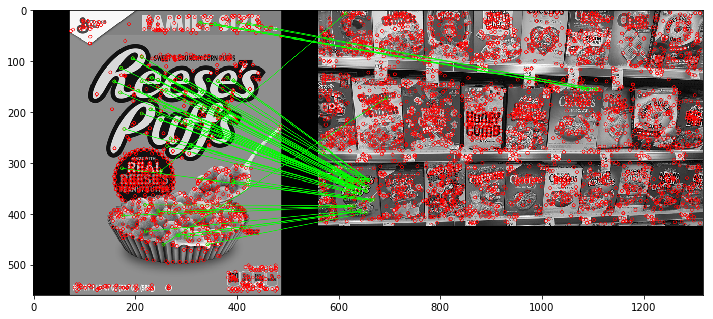

In [38]:
reeses = cv2.imread('reeses_puffs.png',0)
cereals = cv2.imread('many_cereals.jpg',0)


# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

display(flann_matches)